## Labeling Connected Components

Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

Load and display image

In [2]:
def load_image(image_path, threshold=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return binary


def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Implement dilation operation in this section


In [4]:
def dilation(binary_image, struct_elem):
    dilated = cv2.dilate(binary_image, struct_elem)
    return dilated



![connected _components_Extraction](./connected%20_components_Extraction.jpeg)

Based on the morphological relation shown in the image above, complete the function `morphological_connected_component` to identify and label connected components.

`labeled` is an array with the same size as the input image, where each pixel holds the label of the connected component it belongs to.


In [56]:
def morphological_connected_component(binary_image, structure=None):
    if structure is None:
        structure = np.ones((3, 3), dtype=np.uint8)
    binary_image = (binary_image > 0).astype(np.uint8) * 255

    visited = np.zeros_like(binary_image, dtype=np.uint8)
    labeled = np.zeros_like(binary_image, dtype=np.uint16)
    label_count = 1

    h, w = binary_image.shape

    for y in range(h):
        for x in range(w):
            if binary_image[y, x] == 255 and visited[y, x] == 0:
                X = np.zeros_like(binary_image, dtype=np.uint8)
                X[y, x] = 255
                while True:
                    X_next = cv2.bitwise_and(dilation(X, structure), binary_image)
                    if np.array_equal(X_next, X):
                        break
                    X = X_next

                visited = cv2.bitwise_or(visited, X)
                labeled[X == 255] = label_count
                label_count += 1

    return labeled

##################################################


In [57]:
def display_labeled_components(labeled_img):
    max_label = labeled_img.max()
    labeled_color = np.zeros((*labeled_img.shape, 3), dtype=np.uint8)

    for label in range(1, max_label + 1):
        mask = labeled_img == label
        color = np.random.randint(0, 255, size=3)
        labeled_color[mask] = color

    plt.imshow(labeled_color)
    plt.title("Labeled Components")
    plt.axis('off')
    plt.show()


### In the image "Connected_Components", there are 10 connected components. Complete the code below to label them using morphological operations.


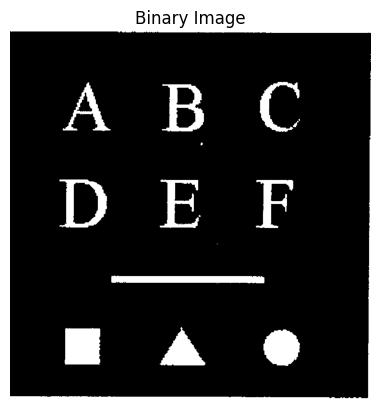

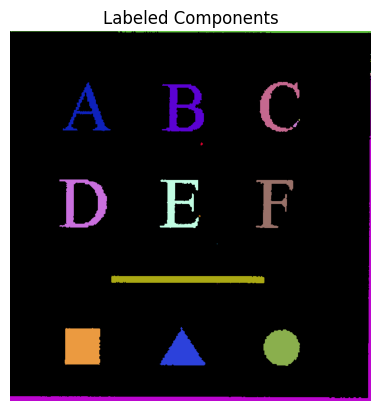

In [58]:
path = "Connected_Components.png"

binary_img = load_image(path)
show_image(binary_img, "Binary Image")

labeled = morphological_connected_component(binary_img)
display_labeled_components(labeled)


## Skeleton Extraction

Import libraries

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


Load and display image

In [60]:
def load_and_binarize_image(image_path, threshold=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return (binary // 255).astype(np.uint8)


def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Implement erosion operation in this section


In [73]:
def erosion(binary_image, struct_elem):
    eroded = cv2.erode(binary_image, struct_elem)
    return eroded

##################################################

Implement dilation operation in this section


In [74]:
def dilation(binary_image, struct_elem):
    dilated = cv2.dilate(binary_image, struct_elem)
    return dilated

##################################################

Implement opening operation in this section


In [75]:
def opening(binary_image, struct_elem):
    eroded = erosion(binary_image, struct_elem)
    opened = dilation(eroded, struct_elem)
    return opened

##################################################

<img src="./skeletion_relation.jpeg" style="width:600px"/>


Based on the morphological operations illustrated in the image above, complete the function `morphological_skeleton` to compute the skeleton of a binary image using iterative morphological erosion and opening.

In [99]:
def morphological_skeleton(binary_image, struct_elem=None):
    if struct_elem is None:
        struct_elem = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]],dtype=np.uint8)
    skeleton = np.zeros_like(binary_image)

    while True:
        eroded = erosion(binary_image, struct_elem)
        opened = opening(binary_image, struct_elem)

        temp = cv2.subtract(binary_image, opened)
        skeleton = cv2.bitwise_or(skeleton, temp)

        binary_image = eroded.copy()

        if cv2.countNonZero(eroded) == 0:
            break
    return skeleton

##################################################

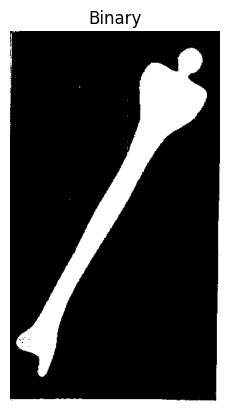

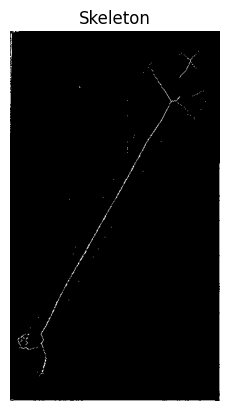

In [100]:
path = "skeleton.jpeg"
binary = load_and_binarize_image(path)
plt.imshow(binary, cmap='gray');
plt.title("Binary");
plt.axis('off');
plt.show()

skel = morphological_skeleton(binary)
plt.imshow(skel, cmap='gray');
plt.title("Skeleton");
plt.axis('off');
plt.show()